In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dna_df = pd.read_csv("E:\研究生\EECS 6690\codon_usage.csv")
#dna_df = pd.read_excel("codon_usage.xlsx")
dna_df

C:\Users\11518\AppData\Local\Temp\ipykernel_31112\3652981554.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dna_df = pd.read_csv("E:\研究生\EECS 6690\codon_usage.csv")


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [2]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(dna_df)

no missing values left


In [3]:
dna_df.shape

(13028, 69)

In [4]:
df = dna_df.drop(486)
df = df.drop(5063)
df['UUU'] = pd.to_numeric(df['UUU'])
df['UUC'] = pd.to_numeric(df['UUC'])
df.shape

(13026, 69)

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [14]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x1)

In [15]:
y = df['DNAtype']

In [37]:
df_dna_count = pd.DataFrame(df['DNAtype'])
dna_count = df_dna_count.value_counts()
dna_count1 = pd.DataFrame({'Type Count': dna_count})
dna_count1

,Type Count
DNAtype,
0,9265
1,2899
2,816
4,31
12,5
3,2
5,2
9,2
11,2


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [41]:
from random import randint
colors = []

for i in range(13):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

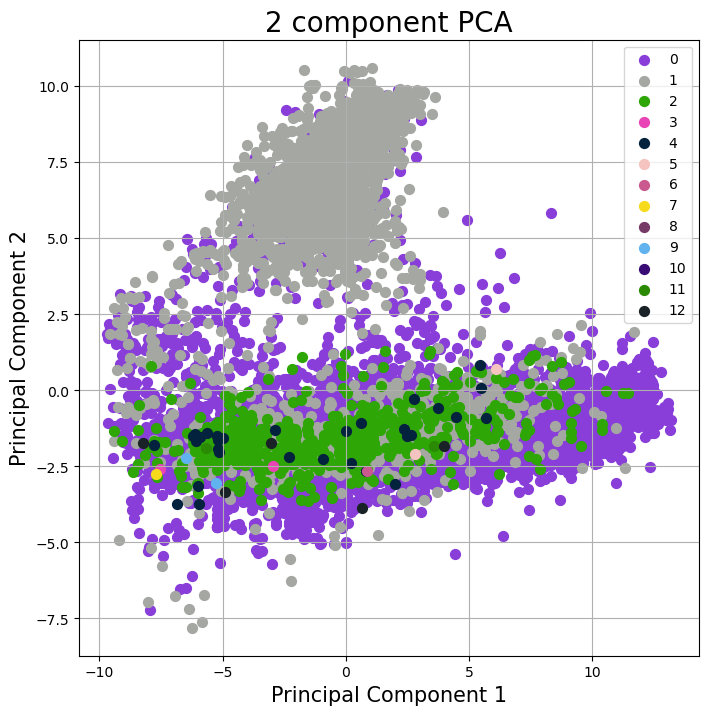

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,13))

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DNAtype'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [80]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [81]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [83]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [51]:
from random import randint
colors = []

for i in range(13):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [93]:
colors

['#97D3F5',
 '#0BCBCA',
 '#AD1FE5',
 '#7F4410',
 '#F07AAA',
 '#A6150F',
 '#AB15F3',
 '#346136',
 '#19B78F',
 '#1375EF',
 '#0CEF12',
 '#E8258F',
 '#1D2F47']

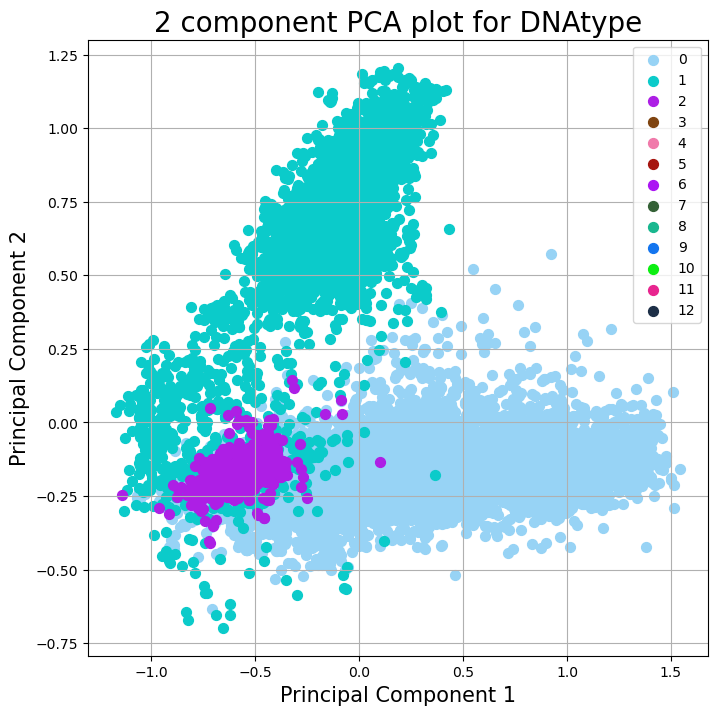

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA plot for DNAtype', fontsize = 20)
targets = list(range(0,13))

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DNAtype'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [74]:
dna_df = pd.read_csv("codon_usage_kingdom.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,euk,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,euk,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,euk,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,euk,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [75]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['Kingdom']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom','SpeciesID','Ncodons','SpeciesName'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [77]:
finalDf = pd.concat([principalDf, y], axis = 1)

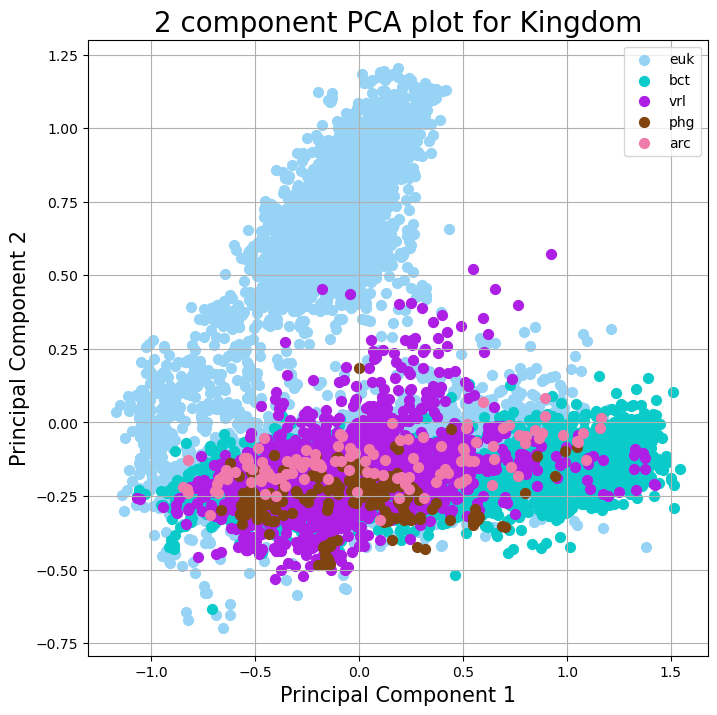

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA plot for Kingdom', fontsize = 20)
targets = ['euk','bct','vrl','phg','arc']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Kingdom'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [2]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [3]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(x_scaled)
embedding.shape

(12962, 2)

In [12]:
umapDf = pd.DataFrame(data = embedding
             , columns = ['UMAP 1', 'UMAP 2'])

In [13]:
finalDf = pd.concat([umapDf, y], axis = 1)

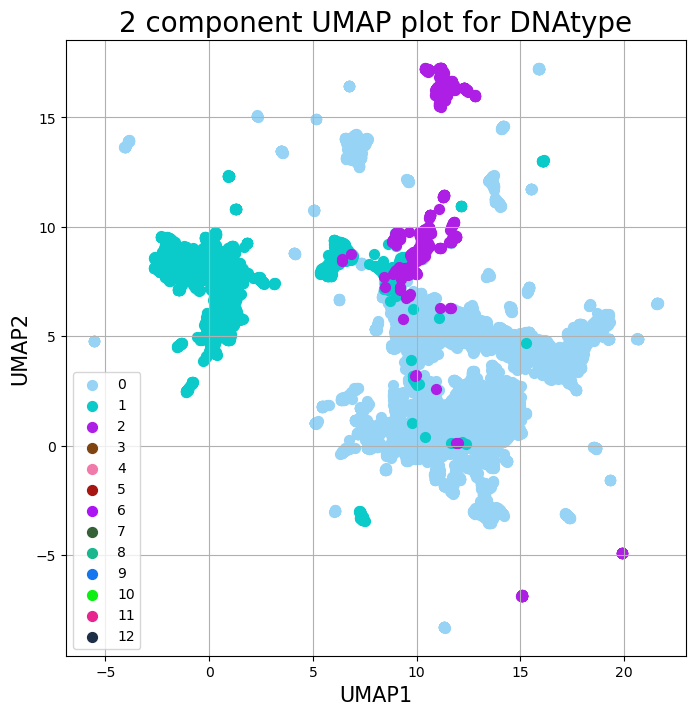

In [18]:



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP1', fontsize = 15)
ax.set_ylabel('UMAP2', fontsize = 15)
ax.set_title('2 component UMAP plot for DNAtype', fontsize = 20)
targets = list(range(0,13))
colors = ['#97D3F5',
 '#0BCBCA',
 '#AD1FE5',
 '#7F4410',
 '#F07AAA',
 '#A6150F',
 '#AB15F3',
 '#346136',
 '#19B78F',
 '#1375EF',
 '#0CEF12',
 '#E8258F',
 '#1D2F47']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DNAtype'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'UMAP 1']
               , finalDf.loc[indicesToKeep, 'UMAP 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
dna_df = pd.read_csv("codon_usage_kingdom.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,euk,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,euk,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,euk,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,euk,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [20]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['Kingdom']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom','SpeciesID','Ncodons','SpeciesName'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [21]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(x_scaled)
embedding.shape

(12962, 2)

In [22]:
umapDf = pd.DataFrame(data = embedding
             , columns = ['UMAP 1', 'UMAP 2'])

In [23]:
finalDf = pd.concat([umapDf, y], axis = 1)

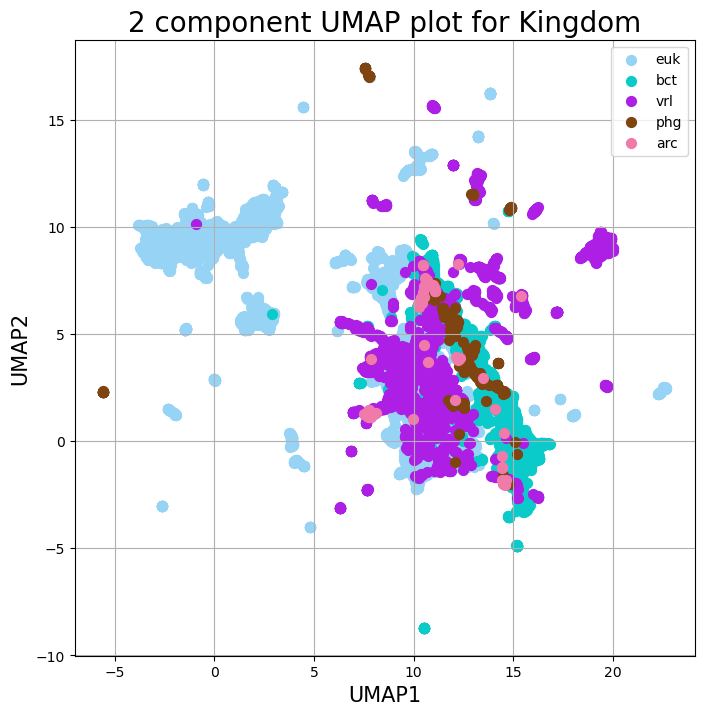

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP1', fontsize = 15)
ax.set_ylabel('UMAP2', fontsize = 15)
ax.set_title('2 component UMAP plot for Kingdom', fontsize = 20)
targets = ['euk','bct','vrl','phg','arc']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Kingdom'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'UMAP 1']
               , finalDf.loc[indicesToKeep, 'UMAP 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[Text(0.5, 1.0, 'T-SNE plot for Kingdom')]

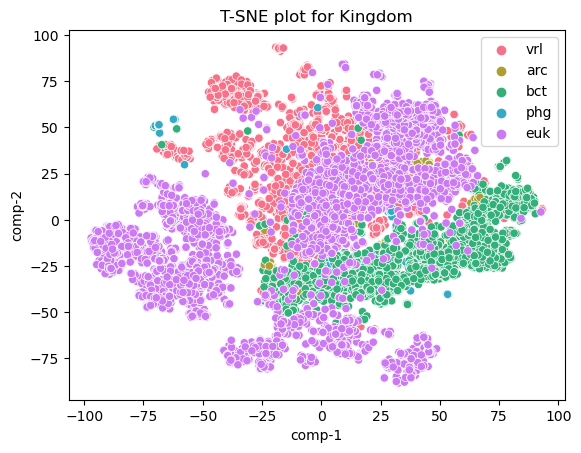

In [31]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("husl", 5),
                data=df).set(title="T-SNE plot for Kingdom")

In [32]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [33]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

[Text(0.5, 1.0, 'T-SNE plot for DNAtype')]

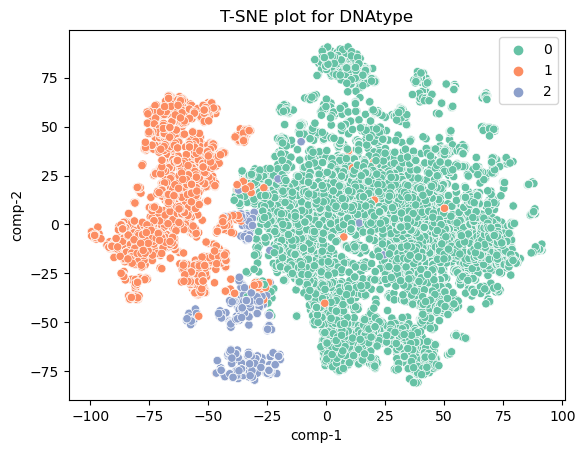

In [36]:
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(x) 

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette('Set2',3),
                data=df).set(title="T-SNE plot for DNAtype")